In [25]:
#进行数学运算
import math
import numpy as np
#进行随机选择
import random
import matplotlib.pyplot as plt

In [26]:
point=[]
layout = []
filename = "./readytorun.txt"

In [27]:
def prepare_data(select):
    point.clear()
    layout.clear()
    num = 1
    for line in open(filename):
        index, x, y = line.strip().split(",")
        if int(index) % select == 0:
            point.extend([(num,(float(x),float(y)))])
            num = num + 1
    for i in range(len(point)):
        layout.append([i+1, random.randint(1,4), 0])
    print(layout[:])
    print(point[:])

In [28]:
prepare_data(1)

[[1, 1, 0], [2, 3, 0], [3, 2, 0], [4, 2, 0], [5, 4, 0], [6, 1, 0], [7, 4, 0], [8, 2, 0], [9, 2, 0], [10, 3, 0], [11, 1, 0], [12, 1, 0], [13, 2, 0], [14, 2, 0], [15, 4, 0], [16, 4, 0], [17, 1, 0], [18, 2, 0], [19, 2, 0], [20, 1, 0], [21, 1, 0], [22, 2, 0], [23, 3, 0], [24, 1, 0], [25, 3, 0], [26, 1, 0], [27, 4, 0], [28, 1, 0], [29, 3, 0], [30, 2, 0], [31, 3, 0], [32, 4, 0], [33, 3, 0], [34, 3, 0], [35, 4, 0], [36, 2, 0], [37, 3, 0], [38, 2, 0], [39, 2, 0], [40, 4, 0], [41, 3, 0], [42, 4, 0], [43, 3, 0], [44, 3, 0], [45, 2, 0], [46, 4, 0], [47, 3, 0], [48, 4, 0], [49, 2, 0], [50, 2, 0], [51, 3, 0], [52, 1, 0], [53, 4, 0], [54, 2, 0], [55, 1, 0], [56, 3, 0], [57, 4, 0], [58, 1, 0], [59, 1, 0], [60, 4, 0], [61, 1, 0], [62, 4, 0], [63, 1, 0], [64, 3, 0], [65, 1, 0], [66, 3, 0], [67, 4, 0], [68, 1, 0], [69, 1, 0], [70, 2, 0], [71, 1, 0], [72, 4, 0], [73, 1, 0], [74, 2, 0], [75, 3, 0], [76, 2, 0], [77, 1, 0], [78, 2, 0], [79, 4, 0], [80, 1, 0], [81, 1, 0], [82, 2, 0], [83, 3, 0], [84, 3, 0], 

In [29]:
gapx, gapy = 100, 50
def getPos(i,m):
    pointx = point[i][1][0]
    pointy = point[i][1][1]
    # print(pointx, pointy)
    if m==1:
        return [(pointx,pointy),(pointx+gapx,pointy),(pointx+gapx,pointy+gapy),(pointx,pointy+gapy)]
    elif m==2:
        return [(pointx-gapx,pointy),(pointx,pointy),(pointx,pointy+gapy),(pointx-gapx,pointy+gapy)]
    elif m==3:
        return [(pointx-gapx,pointy-gapy),(pointx,pointy-gapy),(pointx,pointy),(pointx-gapx,pointy)]
    else:
        return [(pointx, pointy-gapy),(pointx+gapx,pointy-gapy),(pointx+gapx,pointy),(pointx,pointy)]
    
print(getPos(1,2))

[(4188.0, 9739.0), (4288.0, 9739.0), (4288.0, 9789.0), (4188.0, 9789.0)]


In [30]:
def inner(point, rec):
    if point[0] > rec[0][0] and point[1] > rec[0][1] and point[0] < rec[1][0] and point[1] > rec[1][1] and point[0] < rec[2][0] and point[1] < rec[2][1] and point[0] > rec[3][0] and point[1] < rec[3][1]:
        return True
    return False

In [31]:
def conflict(vect,i,j):
    """
    判断冲突
    """
    m = vect[i][1]
    n = vect[j][1]
    reci = getPos(i,m)
    recj = getPos(j,n)
    for i in range(len(reci)):
        if inner(reci[i], recj):
            return True
    return False


In [32]:
def cost_function(vect, x=3, y=0.1):
    """
    计算每个点冲突
    """
    sum = 0
    res = 0
    for i in range(len(point)):
        temp = 0
        res = res + vect[i][1]*y
        for j in range(len(point)):
            if i != j:
                if(conflict(vect,i,j)):
                    temp = temp + 1
        vect[i][2] = temp
        sum = sum + temp
    # print("conflict:"+str(sum))
    sum = x*sum+res
    return sum
cost_function(layout, 1, 0)
# print(costroad(layout))

36

In [33]:
def cost_dif(new_set, old_set, pointx):
    conflict_sum = 0
    for i in range(len(point)):
        a = conflict(new_set, i, pointx-1)
        b = conflict(old_set, i, pointx-1)
        # print(i,pointx,a,b)
        if a is True and b is False:
            conflict_sum = conflict_sum + 1
        elif a is False and b is True:
            conflict_sum = conflict_sum - 1
    # print(new_set[pointx-1][1], old_set[pointx-1][1])
    conflict_sum = conflict_sum * 3 - new_set[pointx-1][1]*0.1 + old_set[pointx-1][1]*0.1
    return conflict_sum
            

In [34]:
import copy
def generate_new_set(old_set):
    sel = random.sample(old_set,1)
    while True:
        nextPos = random.randint(1,4)
        if nextPos != sel[0][1]:
            break
    m = [sel[0][0],sel[0][1],nextPos]
    new_set = copy.deepcopy(old_set)
    new_set[sel[0][0]-1][1] = m[2]
    diff = cost_dif(new_set, old_set, m[0])
    # print(old_set)
    return (new_set,m,diff)
a,b,c = generate_new_set(layout)
print(c)

-0.10000000000000003


In [35]:
import matplotlib.pyplot as plt
def plot(layout, name):
        def create_rect(index, width, height):
                pointx = point[i][1][0]
                pointy = point[i][1][1]
                m = layout[i][1]
                if m==1:
                        x,y = pointx,pointy
                elif m==2:
                        x, y = pointx-width,pointy
                elif m==3:
                        x, y = pointx-width,pointy-height
                else:
                        x, y = pointx, pointy-height
                rect=plt.Rectangle(
                        (x, y),  # (x,y)矩形左下角
                        width,  # width长
                        height,  # height宽
                        # color='maroon', 
                        fill = False)
                return rect
        fig1 = plt.figure(figsize=(8,10))
        plt.axis('off')
        ax1 = fig1.add_subplot(111)

        for i in range(len(point)):
                ax1.add_patch(create_rect(i, gapx, gapy))
        plt.xlim(2600,5100)
        plt.ylim(7100,12412)
        plt.savefig("./result/resultImg-{}.svg".format(name), format="svg")
        plt.show()
# plot()
# plt.savefig('scatter.eps',dpi=600,format='eps')

In [36]:
def sasearch(origin_times, init_temperature, min_temperature, cooling_rate, iterates, namefortest):
    # init T
    T = init_temperature
    no_cnt = 0
    layout = []
    result_layout = []
    result_record = []
    for t1 in range(origin_times):
        layout.clear()
        for i in range(len(point)):
            layout.append([i+1, random.randint(1,4), 0])
        print("initial state:")
        cost = cost_function(layout)
        print(cost)
        nameprefix = str(namefortest) + str(cost)
        plot(layout=layout,name=nameprefix)
        # plot(layout=layout)
        # print(cost_function(layout))
        while T > min_temperature:
            old_cost = cost_function(layout)
            result_record.append(old_cost)
            for i in range(iterates):
                # old_cost = cost_function(layout)
                # result_record.append(old_cost)
                result_layout.append(layout)
                new_set, m, diff = generate_new_set(old_set=layout)
                # print("diff:" + str(diff))
                # diff = new_cost - old_cost
                if diff < 0:
                    # 重新计数
                    no_cnt = 0
                    # 采纳新解
                    layout = new_set[:]
                else:
                    no_cnt = no_cnt + 1
                    # 新解更坏，这时候以一定几率踩纳
                    # np.exp(-(valuenew-valuecurrent)/t)
                    P = np.exp(-(diff)/T)
                    # print("P:"+str(P))
                    # 如果随机数在概率之内，则采纳
                    if random.random() < P:
                        layout = new_set[:]
            # 退火降温
            T = T * cooling_rate
            print(T)
            # 超过5000次没有被采纳，则结束迭代
            if no_cnt > 5000:
                break
    return (result_record, result_layout, layout)

[[1, 1, 0], [2, 3, 0], [3, 4, 0], [4, 1, 0], [5, 3, 0], [6, 3, 0], [7, 1, 0], [8, 3, 0], [9, 1, 0], [10, 1, 0], [11, 3, 0], [12, 4, 0], [13, 3, 0], [14, 1, 0], [15, 4, 0], [16, 2, 0], [17, 3, 0], [18, 4, 0], [19, 3, 0], [20, 4, 0], [21, 4, 0], [22, 1, 0], [23, 2, 0], [24, 2, 0], [25, 2, 0], [26, 2, 0], [27, 3, 0], [28, 4, 0], [29, 1, 0], [30, 4, 0], [31, 2, 0], [32, 2, 0], [33, 4, 0], [34, 4, 0], [35, 2, 0], [36, 4, 0], [37, 2, 0], [38, 3, 0], [39, 3, 0], [40, 3, 0], [41, 2, 0], [42, 1, 0], [43, 2, 0], [44, 4, 0], [45, 3, 0], [46, 1, 0], [47, 1, 0], [48, 4, 0], [49, 2, 0], [50, 2, 0], [51, 1, 0], [52, 4, 0], [53, 4, 0], [54, 1, 0], [55, 4, 0], [56, 3, 0], [57, 2, 0], [58, 2, 0], [59, 4, 0], [60, 1, 0], [61, 4, 0], [62, 3, 0], [63, 4, 0], [64, 1, 0], [65, 2, 0], [66, 4, 0], [67, 1, 0], [68, 2, 0], [69, 2, 0], [70, 3, 0], [71, 4, 0], [72, 2, 0], [73, 4, 0], [74, 3, 0], [75, 4, 0], [76, 2, 0], [77, 2, 0], [78, 2, 0], [79, 2, 0], [80, 2, 0], [81, 3, 0], [82, 4, 0], [83, 2, 0], [84, 2, 0], 

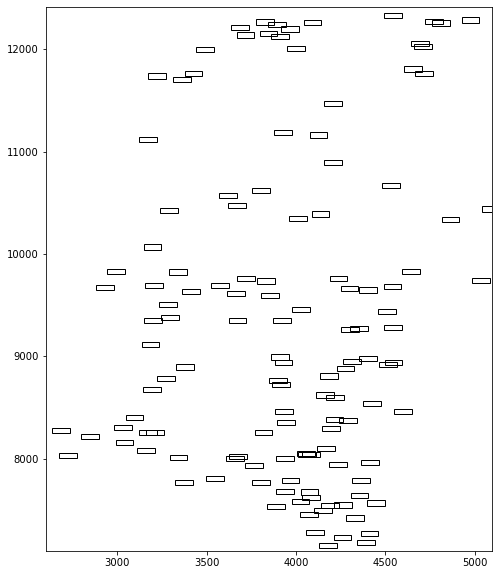

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

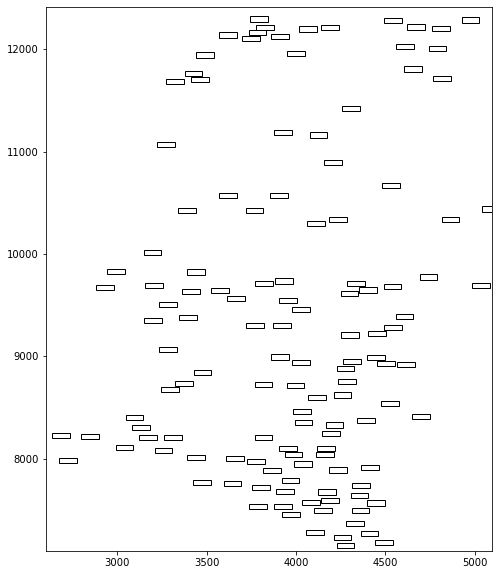

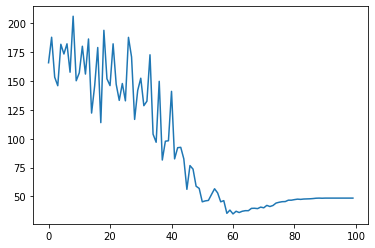

In [37]:
# result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=500)


prepare_data(1)
test1_name1 = "200_500_128_random"
test1_name2 = "200_500_128_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=500, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)
plt.plot(result_record)
plt.show()

initial state:


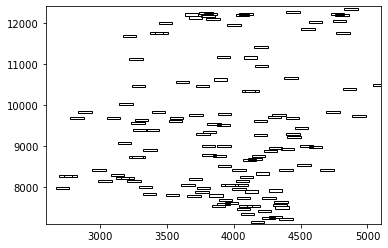

176.70000000000002
4500.0
4050.0
3645.0
3280.5
2952.4500000000003
2657.2050000000004
2391.4845000000005
2152.3360500000003
1937.1024450000004
1743.3922005000004
1569.0529804500004
1412.1476824050003
1270.9329141645003
1143.8396227480503
1029.4556604732452
926.5100944259207
833.8590849833287
750.4731764849959
675.4258588364963
607.8832729528467
547.0949456575621
492.3854510918059
443.14690598262536
398.8322153843628
358.94899384592657
323.05409446133393
290.7486850152005
261.6738165136805
235.50643486231246
211.9557913760812
190.7602122384731
171.68419101462578
154.5157719131632
139.0641947218469
125.15777524966221
112.64199772469598
101.37779795222639
91.24001815700375
82.11601634130338
73.90441470717305
66.51397323645574
59.862575912810165
53.87631832152915
48.488686489376235
43.63981784043861
39.27583605639475
35.348252450755275
31.813427205679748
28.632084485111772
25.768876036600595
23.191988432940537
20.872789589646484
18.785510630681834
16.90695956761365
15.216263610852286
13.694

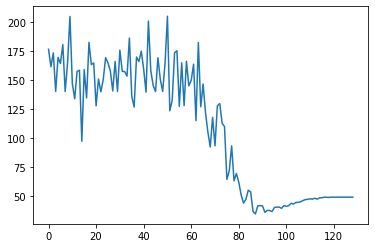

In [ ]:
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=5000, min_temperature=1e-3, cooling_rate=0.90, iterates=500)
plt.plot(result_record)
plt.show()

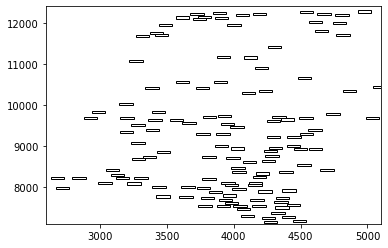

In [ ]:
plot(layout=layout)